This is the first in a series of posts that work through a machine learning problem from beginning to end. This series of posts will be broken down into 4 steps corresponding with my machine learning workflow.  
1. Exploratory Analysis 
2. Data Cleaning & Feature Engineering
3. Model Training
4. Project Delivery 

Before we delve into the Exploratory Analysis I always like to take a minute to summarize the problem description and problem summary to ensure I have a solid high level understanding of the task before deliving into the data.

### Problem Description & Summary
Empolyee retention is a constant concern of HR departments. Loosing an employee before intial investments have paid off, to say nothing of losses on continuing investments, is an undesirable situation for all parties involved. So it makes sense that more proactive HR departments would be interested in tools that would be able to predict which employees were at risk of leaving so they can reach out to them to try and fix things before it's too late. This is a classic classification problem. Having been provided a dataset of past employees and their status the task is to build a classification model using said dataset. 

<pre style="font-size: 15px !important; text-align:center">
Deliverable: <strong>Executable model script</strong>
Machine learning task: <strong>Classification</strong>
Target variable: <strong>Status (Employed/Left)</strong>
Win condition: <strong>N/A (best possible model)</strong></pre>
<br><hr id="toc">
### The Breakdown

In this module, part 1 of 4, I'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [1]:
# Computing libraries 
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load employee data from CSV
df = pd.read_csv('employee_data.csv')

Now we're ready to jump into exploring the data!

<span id="basic"></span>
### 1. Basic information

Let's begin by displaying the dataset's basic information. I like to start with the dataframe dimensions, datatypes, head, and tail of the dataframe. Starting with the dataframe dimensions allows me to check that our observations to features ratio is large enough that I don't have to worry about insufficient data. Checking data types allows me to see how many numerical vs categorical features I have. Finally, I can do a quick sanity check on the head and tail to make sure I don't have any obviously corrupted data. 

From exploring the basic info below I have already noted that there are lots of NaN values in the <code style="color:steelblue">'filed_complaint'</code>, and <code style="color:steelblue">'recently_promoted'</code> columns. I suspect these featues should be categorical variables instead of numerical ones. I'll definitely want to keep this in mind for my Data Cleaning & Feature Engineering...

In [3]:
# Dataframe dimensions
df.shape

(14249, 10)

In [4]:
# Column datatypes
df.dtypes
#df.dtypes[df.dtypes =='object']

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [5]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [6]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="numeric"></span>
### 2. Distributions of numeric features

I find one of the most enlightening data exploration tasks is plotting the distributions of the features. I start with a histogram grid for all the numeric features, making sure to format things so the figure is easy to read. Then I make a heatmap to see which numerical features are most highly correlated with each other. Finally, I print the summary statistics for the numerical features to make sure the numbers make sense for the categories.

In the histogram below I see confirmation that <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> really should be categorical variables since all the data seems to be 0/NaN or 1. None of the correlations in the heatmap are particularly strong. However, the heatmap is of limited use right now as our target variable is categorical and not numerical. We will have to wait till the Segmentations section to get more clarity on the strongest predictors of our target variable. From the summary statistics I've noticed that <code style="color:steelblue">'last_evaluation'</code>, <code style="color:steelblue">'satisfaction'</code>, and <code style="color:steelblue">'tenure'</code> are missing data. I will have to decide whether to interpolate, drop, or label that missing data later when I'm doing my Data Cleaning. 

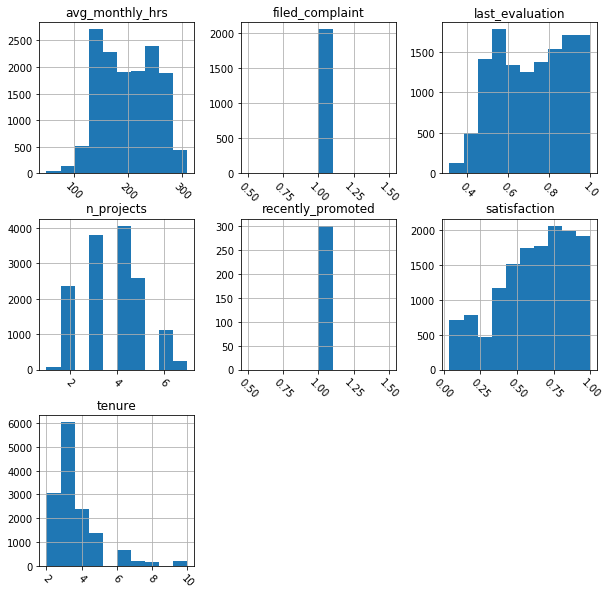

In [7]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)
# Clear the text "residue"
plt.show()

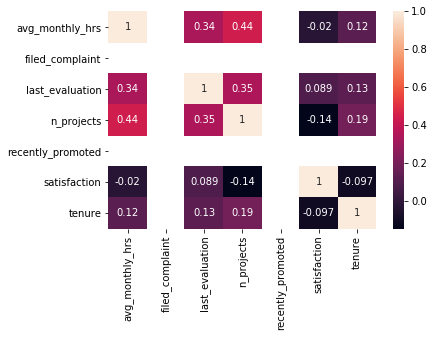

In [8]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

In [9]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="categorical"></span>
### 3. Distributions of categorical features

Next, I'm going to take a look at the distributions of the categorical features. I started with the summary statistics to see if there were any obvious gaps in the data. Then I used a loop to produce a bar graph for all 3 categorical features, including the indicator variable. Since these are categorical features I am not able to make a heatmap to see correlations.

In the categorical feature description I noticed that there is some missing data for the <code style="color:steelblue">'department'</code> feature. I'll have to decide how to deal with this missing data in Data Analysis & Feature Engineering. There are no surprises in the barcharts for <code style="color:steelblue">'salary'</code> or <code style="color:steelblue">'status'</code>. However, it looks like there may be some sparse data for some of the <code style="color:steelblue">'department'</code> sub-categories. There may even be some unnecessary category splitting between <code style="color:steelblue">'Information Technology'</code> and <code style="color:steelblue">'IT'</code>. I'll have to decide if it makes sense to combine any of these categories or elimiate them from my analysis completely in Data Analysis & Feature Engineering.



In [10]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


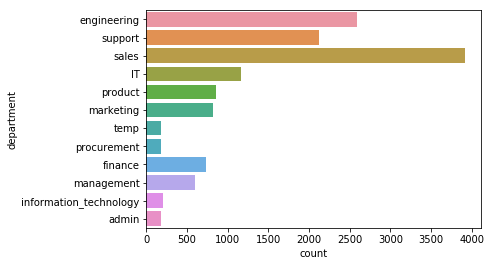

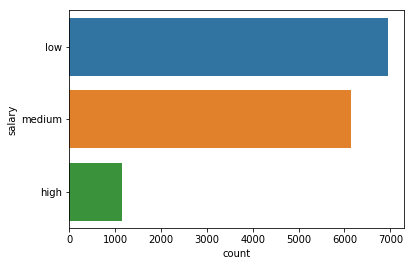

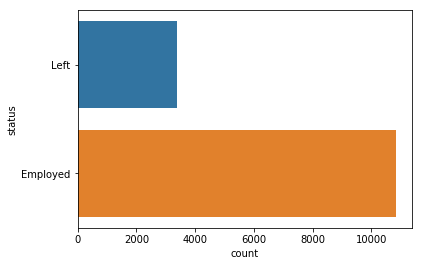

In [11]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes =='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="segmentations"></span>
### 4. Segmentations

Now onto segmentations! Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features. I really enjoy these as this is where I really start to dig into the contours of the data driving the outcomes in the target variable. Personally, for categorical problems especially, I like to start with violin plots followed by scatter plots color coded by target variable outcomes. A groupby statistical summary may provide a larger quantity of information but it is much easier to understand the behavior of the data visually than numerically. The violin plot, even though it's a bit technical for the lay audience is chock full of useful information. Not only does it contain the descriptive information of a boxplot. It also contains distribution data that helps to understand what's driving the descriptive information and indicate any natural categories to be coded later in Feature Engineering. 

In the violin plots below I've noticed that both high and low performing employees left the company and there may in fact be a higher proportion of high performers who leave rather than low performers. This information only serves to highlight the necessity of developing an early intervention system to prevent the company driving away its most productive employees. 



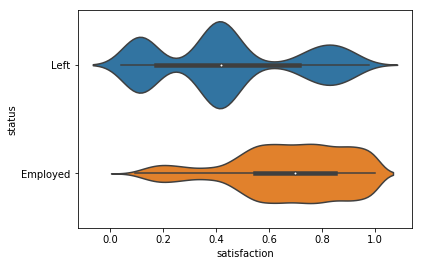

In [12]:
# Segment satisfaction by status and plot distributions
sns.violinplot(x='satisfaction', y='status', data=df)

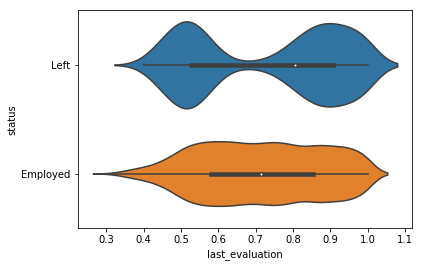

In [13]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(x='last_evaluation', y='status', data=df)

In [14]:
df.groupby('status').describe()

avg_monthly_hrs                                                    \
                   count        mean        std   min    25%    50%    75%   
status                                                                       
Employed         10857.0  197.700286  46.945468  49.0  160.0  197.0  238.0   
Left              3392.0  206.502948  61.753651  63.0  146.0  222.5  262.0   

                filed_complaint       ...  satisfaction             tenure  \
            max           count mean  ...           75%       max    count   
status                                ...                                    
Employed  287.0          1902.0  1.0  ...      0.849432  1.000000  10701.0   
Left      310.0           156.0  1.0  ...      0.714985  0.979577   3367.0   

                                                        
              mean       std  min  25%  50%  75%   max  
status                                                  
Employed  3.380245  1.565510  2.0  2.0  3.0  4.0  10.0  
Left      3.869023  0.973084  2.0  3.0  4.0  5.0   6.0  

[2 rows x 56 columns]

In [15]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

Since in this project the target variable is categorical, I find it can often be helpful to expand the segmentation analysis. In the violin plots above I noticed three distict lobes when I plotted <code style="color:steelblue">'employee_satisfaction'</code> by <code style="color:steelblue">'status'</code>. I'd like to explore that a bit more with a bivariate segmentation plot to see if maybe I can come up with segmentation metrics for my Data Analysis & Feature Engineering later.

When I created the segmentation plot the much larger set of employees who stayed massively overshadowed those who left even after I adjusted the transparency to be able to see both groupings. So to get more clarity on those who left I made a second plot only for those who left the company. I definitely saw the same three groupings from the violin plot but now I see how they vary by <code style="color:steelblue">'last_evaluation'</code> as well as <code style="color:steelblue">'satisfaction'</code>.

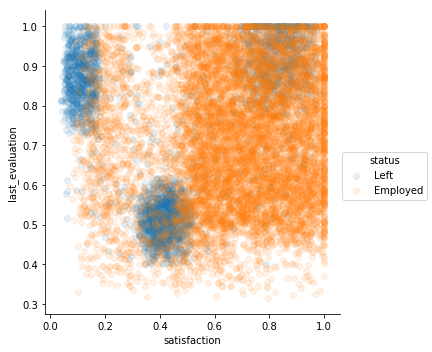

In [16]:
# Bivariate segmentation scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', data=df, hue='status', fit_reg=False, scatter_kws={'alpha': 0.1})

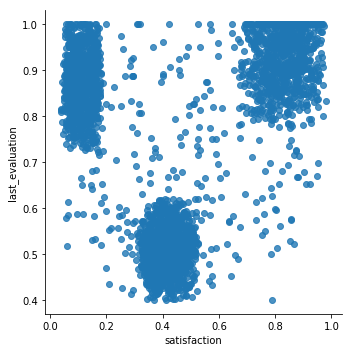

In [17]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df['status'] == 'Left'], fit_reg=False)

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br>
## Next Steps
As a reminder, here are a few things I did in my Exploratory Analysis:
* Explored basic information about the dataset.
* Plotted distributions of numeric and categorical features.
* Segmented the dataset by <code style="color:steelblue">'status'</code>.
* Dove into some advanced, bivariate segmentations.

Now it's onto the next module, <span style="color:royalblue">Part 2: Data Cleaning & Feature Engineering</span>. If you are following this project from start to finish I might recommend keeping this workbook open in a separate tab. It might be helpful to have these charts in front of you for reference as you follow my data cleaning and feature engineering in the next section.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>